In [1]:
%matplotlib inline
import numpy as np
import pymc3 as pm  # así se suele importar PyMC3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-colorblind')

# Teorema de Bayes e inferencia estadística
En este curso aprenderemos sobre una forma de hacer estadística llamada usualmente estadística Bayesiana. El nombre se debe a Thomas Bayes (1702-1761) un ministro presbiteriano, y matemático aficionado, quien derivó por primera vez lo que ahora conocemos como el **teorema de Bayes**, el cual fue publicado (postumanente) en 1763. Sin embargo una de las primeras personas en realmente desarrollar métodos Bayesianos, fue Pierre-Simon Laplace (1749-1827), por lo que tal vez sería un poco más correcto hablar de _Estadística Laplaciana_ y no Bayesiana.

Es interesante notar que mientras los orígenes de las estadística Bayesiana se remontan al siglo XVII. Los métodos "_clásicos_" (o frecuentistas) fueron desarrollados principalmente durante el siglo XX! De hecho una de las motivaciones para desarrollar métodos frecuentistas fue un _sentimiento_ e ideología anti-bayesianos, el cual sigue latente (aunque con menor fuerza).

## Estadística Bayesiana

La estadística Bayesiana es una forma de modelado que tiene dos ideas centrales:

1. Las probabilidades son un medida de la incerteza que tenemos sobre _cantidades desconocidas_.

2. Dado un conjunto de datos el teorema de Bayes es la forma adecuada de actualizar los valores para las _cantidades desconocidas_. El teorema de Bayes es el único estimador usado en estadística Bayesiana

Los modelos Bayesianos se construyen 

Y que puede resumirse en 3 pasos:

1. **Crear un modelo probabilístico**. Estos modelos se construyen combinando distribuciones de probabilidad para todas las cantidades desconocidas, estás cantidades se llaman distribuciones _a priori_. De forma vaga y general, mientras menos certeza tengamos sobre una cantidad, más _ancha_ será la distribución que usaremos para modelar esa cantidad. En el caso extremo si asumimos certeza absoluta tendremos cantidades constantes o si se quiere distribuciones concentradas en un punto ([delta de Dirac](https://es.wikipedia.org/wiki/Delta_de_Dirac)), muchas veces los datos se consideran constantes (pero esto no es obligatorio). Cada distribución de probabilidad tiene una cantidad de parámetros que la definen, por ejemplo $p$ en la distribución binomial o $\mu$ y $\sigma$ para una Gaussiana. Por lo tanto también podmeos pensar a nuestro modelo como un conjunto de parámetros relacionados.

2. **Condicionar el modelo a los datos observados a fin de obtener el _a posteriori_**. Usando el teorema de Bayes se actualizan las probabilidades asignadas _a priori_ de acuerdo a los datos observados obteniendose la distribución _a posteriori_. Esta distribución es central y el único objeto de interés directo en estadística Bayesiana, ya que contiene toda la información disponible (según los datos y nuestro modelo).

3. **Evaluar el ajuste del modelo generado a los datos y evaluar las implicancias del modelo**. Se puede demostrar que dada la información previa y los datos observados no existe otro mecanismo capaz de generar una _mejor_ inferencia que la estadística Bayesiana. Esto parece maravilloso, pero hay un problema. Esto solo es cierto si se asumen que los datos y el modelo son correctos. En la práctica, los datos pueden contener errores y los modelos suelen ser, en el mejor de los casos, aproximaciones razonables de fenómeos _reales_, mientras más diferente sea un modelo (Bayesiano, o no) a la _realidad_ menos sentido tendrán los resultados de ese modelo. Por lo tanto los modelos deben ser _criticados_ y _validados_ antes de poder generar conclusiones. En general uno debe evaluar si las predicciones generadas por el modelo se ajustan a los datos observados. Es necesario evaluar si las conclusiones obtenidas tienen sentido dado el marco conceptual en el que uno trabaja, cuan sensibles son los resultados a las detalles del modelo (sobre todo a detalles para los cuales no tenemos demasiada información).

ahora que tenemos una perpectiva general de la estadística Bayesiana, veamos  que es el teorema  de Bayes y de donde surge.

## El teorema de Bayes

El teorema de Bayes es:

$$p(H|D) = \frac{p(D|H) p(H)}{p(D)}$$

El cual también suele ser escrito de la siguiente forma:

$$p(H|D) = \frac{p(D|H)p(H)}{\int_{H^*} p(D|H^*)p(H^*)}$$

En esta segunda forma el valor de $H$ en el numerador hace referencia a un valor particular, mientras que en el denominador $H^*$ hace referencia a todos los valores posibles de $H$. La integral es reemplazada por una sumatoria en el caso que estemos hablando de valores discretos y no continuos.

Esta ecuación (de aspecto, casi trivial) es invaluable por que nos permite relacionar la probabilidad $p(H|D)$ con $p(D|H)$. Si reemplazamos $H$ por _hipótesis_ y $D$ por _datos_ creo que empieza a generarse cierta intuición acerca de la importancia del teorema de Bayes en ciencia. Para poder hacer inferencia la hipótesis $H$, toma la forma de cantidades numéricas desconocidas que debemos averiguar y que llamamos parámetros. En ese sentido la palabra _hipótesis_ debe ser entendida en un contexto algo restringido, quizá sería más adecuado hablar directamente de parámetros de modelos.

Cada término del teorema de Bayes tiene un nombre específico:

* $p(H|D)$: _a posteriori_ 
* $p(D|H)$: _likelihood_ (_verosimilitud_)
* $p(H)$: _a priori_
* $p(D)$: _evidencia_


El **_a priori_** es la forma de introducir conocimiento previo sobre los valores que pueden tomar los parámetros. A veces cuando no sabemos demasiado se suelen usar _a prioris_ que asignan igual probabilidad a todos los valores de los parámetros, otras veces se puede elegir _a prioris_ que restrijan los valores de los parámetros a rangos razonables, algo que se conoce como regularización, por ejemplo solo valores positivos. Muchas veces contamos con información mucho más precisa como medidas experimentales previas o límites impuesto por alguna teoría.

El **_likelihood_** es la forma de incluir nuestros datos en el análisis. Es una expresión matemática que especifica la plausibilidad de los datos. El _likelihood_ es central tanto en estadística Bayesiana como en estadística no-Bayesiana. A medida que la cantidad de datos aumenta el _likelihood_ tiene cada vez más peso en los resultados, esto explica por que a veces los resultados de la estadística Bayesiana y frecuentista coinciden cuando la muestra es _grande_.

El **_a posteriori_** es la distribución de probabilidad para los parámetros. Es la consecuencia lógica de haber usado un conjunto de datos un _likelihood_ y un _a priori_. Se lo suele pensar como la versión actualizada del _a priori_. De hecho un _a posteriori_ puede ser un _a priori_ de un análisis a futuro.

La **_likelihood marginal_** (también llamado _evidencia_) es la probabilidad de observar los datos $D$ promediado sobre todas los posibles hipótesis (o conjunto de parámetros) $H$. Si la oración anterior no es muy clara, no hay problema ya veremos ejemplos que harán más claro este concepto. En general, la _evidencia_ puede ser vista como una simple constante de normalización que en la mayoría de los problemas prácticos puede (y suele) omitirse sin perdida de generalidad. Por lo que el teorema de Bayes suele aparecer escrito como:

$$p(H|D) \propto p(D|H) p(H)$$


El rol de todos estos términos irá quedando más claro a medida que avancemos.

## Estimación de un solo parámetro

### El problema de la moneda versión bayesiana

Vamos a recurrir nuevamente al ejemplo de la moneda que vimos en el capítulo sobre estadística frecuentista, pero esta vez desde la perspectiva Bayesiana. 

En vez de calcular _valores p_ o hacer pruebas de hipótesis nula trataremos de determinar el grado en que una moneda está sesgada. En general cuando se habla de sesgo se hace referencia a la desviación de algún valor (por ejemplo igual proporción de caras y cecas), pero aquí usaremos el termino _sesgo_ de forma más general, el sesgo es un valor que irá entre 0 y 1, siendo 0 para una moneda que siempre cae ceca y 1 para una moneda que siempre cae cara y lo representaremos con la variable $\theta$. A fin de cuantificar $\theta$ arrojaremos, computacionalmente, una moneda al muchas veces. Llevaremos registro de la cantidad de caras obtenidas en la variable $y$.

Habiendo definido nuestro problema 

Según el teorema de Bayes,

$$p(\theta|y) \propto p(y|\theta) p(\theta)$$

Donde, como dijimos $\theta = 1$ quiere decir 100% cara y $\theta = 0$ 100% ceca.

Entonces para poder calcular el _a posteriori_ tenemos que definir como calcular el _lihelihood_ y como el _a priori_, vamos a hacer lo siguiente:

Para representar modelos en estadística se suele utilizar la siguiente notación:

$$\theta \sim \operatorname{Beta}(\alpha, \beta)$$
$$y \sim \operatorname{Bin}(n=1, p=\theta)$$


El símbolo $\sim$ indica que la variable a la izquierda _sigue_ la distribución a la derecha. Entonces podríamos decir que $\mathbf{\theta}$ es una variable aleatoria con distribución beta, y que la distribución beta está definida por los parámetros $\alpha$ y $\beta$, este es nuestro _a priori_. En la siguiente linea tenemos el _likelihood_ el cual está definido por una distribución binomial con parámetros $n=1$ y $p=\theta$. 

Gráficamente esto se puede representar usar los diagramas de Kruschke:


<img src="imagenes/modelo_1_moneda.png" width=350>

De arriba hacia abajo, se observa el _a priori_, luego el likelihood, y por último los datos. Las flechas indican la vinculación entre las partes del modelo y el signo $\sim$ la naturaleza estocástica de las variables.

Por que elejimos este _likelihood_ y este _a priori_. Hay varias formas de justificar esta elección en particular, pero por ahora solo diremos lo siguiente:

* La distribución binomial es una distribución "razonable" a la hora de modelar eventos que tienen dos posibles estados, como cara y ceca. Esta es la misma fustificación usada en el capítulo sobre estadística frecuentista.
* La distribución beta es una distribución que asegura que $\theta$ esté entre 0 y 1 (que son los valores permitidos para el parámetro $p$ de la distribución binomial) y es además una distribución muy flexible como se ve a continuación en un breve ejemplo.

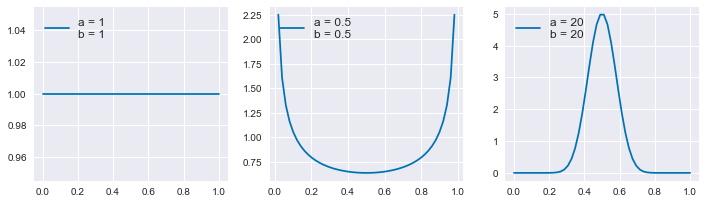

In [2]:
plt.figure(figsize=(10, 3))
x = np.linspace(0, 1, 100)

for ind, (a, b) in enumerate([(1, 1), (0.5, 0.5), (20, 20)]):
    y = stats.beta.pdf(x, a, b)
    plt.subplot(1, 3, ind+1)
    plt.plot(x, y, label='a = %s\nb = %s' % (a, b));
    plt.legend(loc=2, fontsize=12)
plt.tight_layout()

El modelo que acabamos de presentar fue uno de los primero modelos estudiados en los albores de la teoría de probabilidad, por ejemplo por el propio Bayes y por Laplace. Una de las razones de esto es que el modelo es simple de resolver desde el punto de vista matemático. Se puede demostrar que siempre que usemos como _a priori_ una distribución beta y como _likelihood_ una distribución binomial obtendremos como resultado un _a posteriori_ que será  una _nueva_ distribución beta determinada por los siguientes parámetros:

$$p(\theta|y) \propto \operatorname{Beta}(\alpha_{a priori} + y, \beta_{a priori} + N - y)$$

Cuando se cumple que para un cierto _likelihood_ la forma funcional del _a priori_ y la del _a posteriori_ coinciden se dice que el _a priori_ es **conjugado** con el _likelihood_. Historicamente los problemas en estadística Bayesiana estuvieron restringidos al uso de _a prioris_ conjugados, ya que estos garantizan la tratabilidad matemática del problema, es decir garantizan que es posible obtener una expresión analítica para nuestro problema. Hoy en día esto no es más una limitante, ya que como veremos luego, las técnicas computacionales modernas permiten obtener _a posteriori_ incluso cuando no se usan _a prioris_ conjugados. Estas técnica computacionales junto con el aumento de poder de cálculo han permitido el resurgimiento de las ideas Bayesiana y su aplicación a problemas concretos en las últimas décadas.

#### Obteniendo los datos
Bien, ahora que sabemos como calcular el _a posteriori_, lo único que resta es conseguir los datos. En este ejemplo usaremos datos sintéticos, es decir datos obtenidos computacionalmente mediante un generador de números (pseudo)aleatorios, pero bien podrían haber surgido de un experimento con una moneda _real_.

In [4]:
theta_real = 0.35
n_intentos = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
datos = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]

* theta_real: es el verdadero valor de $\theta$. Una de las ventajas de usar datos sintéticos es que sabemos los valores "reales" de los parámetros, algo imposible, en general, para cualquier problema concreto donde debamos analizar datos.

* n_intentos: es el número de veces que arrojamos una moneda al aire. Empezamos con 0 experimentos es decir el momento anterior a la recolección de datos.

* datos: es la cantidad de caras observadas al realizar los "intentos".

#### Calculando el _a posteriori

Por ahora vamos a hacer uso  de la expresión analítica para el _a posteriori_ que dimos como cierta apenas unas lineas atrás. Luego veremos como hacer esto sin necesidad de contar con una expresión analítica del _a posteriori_.

Si miran el código de la siguiente celda verán que la mayoría de las lineas se encargan de dibujar los resultados y no de calcularlos. El cálculo del _a posteriori_ ocurre en la linea 14. Esta linea está  dentro de un _loop_ que itera para cada uno de los tres _a prioris_ que vimos antes (distribución beta), hacer esto nos permitirá ver la influencia del _a priori_ en los resultados.

El cálculo es simple, tan solo se computa el valor del _a posteriori_ (usando la función _pdf_ de la distribución beta provista por SciPy) para 100 puntos igualmente espaciados entre 0 y 1 (linea 5). 

Se puede ver que hay otro bucle el cual empieza en la linea 7, este bucle itera a loa largo de *n_intentos*, es decir para los varios número de experimentos realizados, esto nos permitirá ver como cambia el _a posteriori_ a medida que acumulamos evidencia.

Con una linea negra punteada y vertical se indica el valor real de $\theta$.

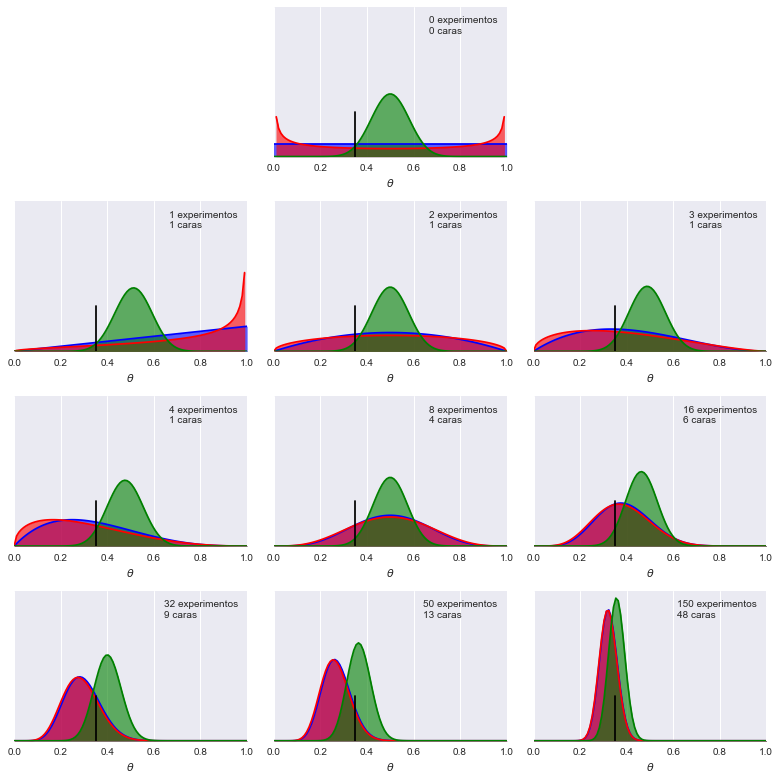

In [5]:
plt.figure(figsize=(11, 11))

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = stats.beta
x = np.linspace(0, 1, 100)

for idx, N in enumerate(n_intentos):
    if idx == 0:
        plt.subplot(4,3, 2)
    else:
        plt.subplot(4,3, idx+3)
    y = datos[idx]
    for (a_priori, b_priori), c in zip(beta_params, ('b', 'r', 'g')):
        p_theta_dado_y = dist.pdf(x, a_priori + y, b_priori + N - y)
        plt.plot(x, p_theta_dado_y, c)
        plt.fill_between(x, 0, p_theta_dado_y, color=c, alpha=0.6)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label="{:d} experimentos\n{:d} caras".format(N, y), alpha=0)
    plt.xlim(0,1)
    plt.ylim(0,12)
    plt.xlabel(r"$\theta$") 
    plt.legend()
    plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()

#### Analizando los resultados

La primer figura del panel muestra los *a priori*, nuestra estimación de $\theta$ dado que no hemos realizado ningún experimento. Las sucesivas nueve figuras muestras las distribuciones *a posteriori* y se indica la cantidad de experimentos y de caras obtenidas. Además se puede ver una linea negra vertical en 0.35, la cual representa el valor verdadero de $\theta$. Por supuesto que en problemas reales este valor es desconocido.

Este ejemplo es realmente ilustrativo en varios aspectos.

* El resultado de un análisis Bayesiano NO es un solo valor, si no una distribución (_a posteriori_) de los valores plausibles de los parámetros (dado los datos y el modelo).
* La dispersión o ancho de las curvas es una medida de la incertidumbre sobre los valores.
* El valor más probable viene dado por la moda de la distribución (el _pico_ de la distribución).
* Aún cuando $\frac{2}{1} = \frac{8}{4}$ son numéricamente iguales tenemos menor incertidumbre en un resultado cuando el número de experimentos es mayor.
* Dada una cantidad _suficiente_ de datos los resultados tienden a converger sin importar el _a priori_ usado.
* La rapidez con la que los resultados convergen varía. En este ejemplo las curvas azul y roja parecen converger con tan solo 8 experimentos, pero se necesitan más de 50 experimentos para que las tres curvas se muestren similares. Aún con 150 experimentos se observan ligeras diferencias.
* Partiendo de los _a priori_ uniforme (azul) o sesgado (rojo) y habiendo realizado un solo experimento y observado una sola cara, lo más razonable es pensar que estamos frente a una moneda con dos caras!
* La situación cambia drásticamente al ver por primera vez una moneda caer ceca. Ahora lo más probable (dado cualquiera de los tres *a prioris*) es inferir que $\theta=0.5$. Los valores de $\theta$ exactamente 0 o 1 se vuelven imposibles.
* El a priori no sesgado (verde) es más informativo que los otros dos (la distribución esta más concentrada), por ello se requiere de un número mas grande de experimentos para "moverlo".
* El a priori uniforme (azul) es lo que se conoce como no informativo. El resultado de un análisis Bayesiano usando un _a priori_ no-informativos en general coinciden con los resultados de análisis frecuentistas (en este caso el valor esperado de $\theta = \frac{y}{N}$).

## Influencia y elección del _a priori_

De los ejemplos anteriores debería quedar claro que los _a priori_ influencian los resultados de nuestros cálculos. Esto tiene total sentido si no fuese así no haría falta incluirlos en el análisis y todo sería más simple (aunque nos perderíamos la oportunidad de usar información previa).

De los ejemplos anteriores también debería quedar claro que a medida que aumentan los datos (como las tiradas de monedas) los resultados son cada vez menos sensibles al _a priori_. De hecho, para una cantidad infinita de datos el _a priori_ no tiene ningún efecto. Exactamente cuantos datos son necesarios para que el efecto del _a priori_ sea despreciable varía según el problema y los modelos usados. En el ejemplo de la moneda se puede ver que 50 experimentos bastan para hacer que dos de los resultados sean prácticamente indistinguibles, pero hacen falta más de 150 experimentos para que los 3 resultados se vuelvan _practicamente_ independientes del _a priori_. Esto es así por que los dos primeros _a prioris_ son relativamente _planos_, mientras que el tercer _a priori_ concentra casi toda la probabilidad en una región relativamente pequeña. El tercer a priori no solo considera que el valor más probable de $\theta$ es 0.5, si no que considera que la mayoría de los otros valores son muy poco probables. ¿Cómo cambiarían los resultados si hubiéramos usado como _a priori_ $\operatorname{Beta}(\alpha=2, \beta=2)$?

La elección de los _a priori_ suele poner nervioso a quienes se inician en el análisis Bayesiano y suele ser la principal crítica de los detractores de este paradigma. El temor es que los _a prioris_ censuren a los datos y no les permitan _hablar por si mismos_! Esto esta muy bien, pero el punto es que los datos hablan, con suerte murmuran. Los datos solo tienen sentido a la luz de los modelos (matemáticos y mentales) usados para interpretarlos, y los _a prioris_ son parte de esos modelos, por lo que hacerlos explícitos suele ser una ventaja!

Hay quienes prefieren usar _a priori_ no-informativos (también conocidos como _a priori_ planos, vagos, o difusos). Estos _a priori_ aportan la menor cantidad posible de información y por lo tanto tienen el menor impacto posible en el análisis. Si bien es posible usarlos, en general hay razones prácticas para no-preferirlos. En este curso seguimos las recomendaciones de Gelman, McElreath, Kruschke y otros de usar lo que se conoce como _a priori ligeramente informativos_. Es decir _a prioris_ tienen información, pero no mucha. En muchos problemas sabemos al menos algo de los valores posibles que pueden tomar nuestros parámetros, por ejemplo que solo pueden ser positivos, o que están restringidos a sumar 1 o el rango aproximado, etc. En esos casos podemos usar _a prioris_ que introduzcan esa _ligera_ información. En estos casos podemos pensar que la función del _a priori_ es la de mantener las inferencias dentro de límites razonables. Estos _a priori_ también se suelen llamar regularizadores y esteacto de regularizar las inferencias es algo que hasta a los frecuentistas les parece muy buena idea!

Por supuesto que también es posible usar _a prioris informativos_ (o _fuertes_). Hacer esto es razonable solo si contamos con información previa confiable. Esto puede ser ventajoso en casos en que los datos contiene poca información sobre el problema. Si la información no viene por el _likelihood_ (datos), entonces puede venir por el _a priori_. A modo de ejemplo, en bioinformática estructural es común usar toda la información previa posible (de forma Bayesiana y no-Bayesiana) para resolver problemas. Esto es posible por la existencia de bases de datos que almacenan los resultados de cientos o miles experimentos realizados a lo largo de décadas de esfuezo. No usar esta información sería casi absurdo! En resumen, si contás con información confiable no hay razón para descartarla, menos si el _arguemento_ es algo relacionado con prenteder ser _objetivo_. No hay objetividad alguna en pretender no saber lo que se sabe!!!

Otra razón para abrazar a los _a prioris_ es que en el fondo no podemos escapar de ellos. Desde una perspectiva Bayesiana todos los modelos (áun los no Bayesianos) tienen _a prioris_, aun cuando no sean explícitos. De hecho muchos resultados de la estadística frecuentista pueden considerarse casos especiales o aproximaciones a modelos Bayesianos con _a prioris planos_. Volviedo a la figura anterior se puede ver que la moda del _a posteriori_ para la curva azul. Coincide con la estimación (puntual) frecuentista para el valor de $\theta$

$$\hat \theta = {{y} \over {N}}$$

$\hat \theta$ es una estimación puntual (un número) y no una distribución.

Este ejemplo nos muestra que no es posible hacer análisis estadísticos y sacarse los _a prioris_ de encima. Un posible corolario es que es más flexible y transparente especificar los _a prioris_ de forma explícita que esconderlos bajo la cama. Al hacerlo ganamos mayor control sobre nuestro modelo, mayor transparencia y por el mismo precio la estimacíón de la incertidumbre con la que se estima cada parámetro.

Por último, hay que recordar que el modelado estadístico (como otras formas de modelado) es un proceso iterativo e interactivo. Nada nos impide usar más de un _a priori_ (o un likelihood) si así lo quisieramos. Una parte importante del modelado es la de cuestionar los supuestos y los _a prioris_ son simplemente un tipo de supuestos (como lo son los _likelihoods_). Si tuvieramos más de un _a priori_ que consideramos razonable  podríamos realizar un _análisis de sensibilidad_, es decir evaluar como cambian los resultados con los _a prioris_, podríamos llegar a la conclusión que para un rango amplio de _a prioris_ los resultados no varían. O al contrario que nuestra inferencia depende enormemente del _a priori_. Ambos resultados son importantes y pueden guiarnos a más preguntas!

Dado que los _a prioris_ tienen un papel central en la estadística Bayesiana, seguiremos discutiéndolos  a medida que vayamos viendo problemas concretos. Por lo que si esta discusión no ha aclarado todas tus dudas y seguís algo confundido, mejor mantener la calma y no preocuparse demasiado, este tema ha sido motivo de discusión y confusión durante décadas (¿siglos?), y la discusión todavía continua!

## PyMC3

PyMC3 es un paquete para programación probabilística bajo Python. PyMC3 permite crear modelos probabilísticos usando una sintaxis intuitiva y fácil de leer que es muy similar a la sintaxis usada para describir modelos probabilísticos.

La mayoría de las funciones de PyMC3 están escritas en Python. Mientras que las partes computacionalmente demandantes están escritas en NumPy y [Theano](http://deeplearning.net/software/theano/index.html), una biblioteca originalmente desarrollada para escribir y desarrollar algoritmos de _[DeepLearning](https://en.wikipedia.org/wiki/Deep_learning)_.

Un lenguaje de programación probabilístico es en lineas generales un lenguaje que permite al usuario describir un modelo probabilístico y luego proceder a realizar la inferencia de forma automática. Esto es posible ya que existen métodos de muestreo (_samplers_ en inglés) que permiten, en principio, resolver cualquier modelo probabilístico y obtener aproximaciones al _a posteriori_, incluso si no se usan _a prioris_ conjugados, como los usados en el ejemplo anterior.

### Métodos de muestreo (samplers)

Existen varios métodos numéricos que pueden funcionar como métodos de muestreo. La mayoría de ellos están basados en la siguiente idea: aún cuando no es posible obtener analíticamente la distribución _a posteriori_ suele ser posible calcular un valor proporcional al _a posteriori_ para un conjunto dado de parámetros.

#### Computación usando una grilla

Usar una grilla para aproximar un cálculo es un método de fuerza bruta muy usado para resolver muchos problemas (no solo problemas en estadística Bayesiana). Asumamos que queremos computar el _a posteriori_ para un modelo con un solo parámetro, el algoritmo sería:

1. Definir un intervalo razonable para calcular el parámetro (en general esto estará definido por el _a priori_).
2. Ubicar una grilla de puntos (por lo general equidistante) en ese intervalo.
3. Para cada punto de la grilla multiplicar el valor del _a priori_ y del _likelihood_.

Opcionalmente podríamos querer normalizar los valores computados, es decir dividir el valor obtenido en cada punto por la suma de los valores obtenidos en todos los puntos.

Es fácil ver que a medida que se aumenta la cantidad de puntos de la grilla se obtiene un mejor resultado. De hecho, si tomáramos un número infinito de puntos obtendríamos la respuesta exacta a nuestro problema. 

El siguiente código implementa el método de la grilla para el problema de la moneda.

In [8]:
def grilla_post(puntos_grilla=100, caras=6, intentos=9):
    """
    A grid implementation for the coin-flip problem
    """
    grilla = np.linspace(0, 1, puntos_grilla)
    a_priori = np.repeat(5, puntos_grilla)
    likelihood = stats.binom.pmf(caras, intentos, grilla)
    unstd_posterior = likelihood * a_priori
    posterior = unstd_posterior / unstd_posterior.sum()
    return grilla, posterior

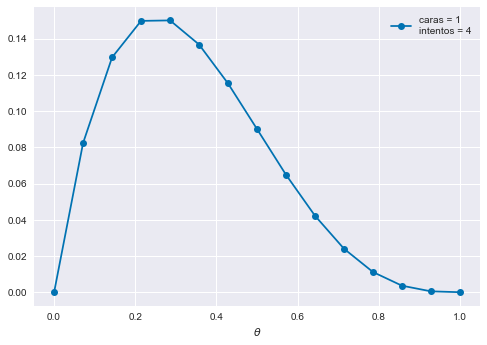

In [11]:
puntos = 15
caras, intentos = 1, 4
grilla, a_posteriori = grilla_post(puntos, caras, intentos)
plt.plot(grilla, a_posteriori, 'o-',
         label='caras = {}\nintentos = {}'.format(caras, intentos))
plt.xlabel(r'$\theta$')
plt.legend(loc=0);

El problema de usar una grilla es que la idea no _escala_ bien con el número de parámetros. De hecho falla a lo grande. Pensemos que cada parámetro es una dimensión _espacial_ A medida que se incrementa el número de parámetros/dimensiones el volumen del _a posteriori_ se hace más pequeño en relación al volumen que es necesario muestrear. Como resultado gastamos la mayor parte del tiempo y los recursos calculando valores que contribuyen extremadamente poco al resultado final.

#### Markov-Chain Monte Carlo

La gran mayoría de los métodos de muestreo usados de forma práctica se clasifican dentro de una gran familia de algoritmos llamados colectivamente _Markov Chain Monte Carlo_ dentro de esta familia discutiremos brevemente solo dos métodos, ya que son de amplio uso. La idea crucial de esta familia de  métodos es ir más allá del lo _naive_ del método de la grilla y gastar la mayor parte del tiempo _visitando_ los valores de los parámetros que más contribuyen al _a posteriori_, la parte _inteligente_ es como hacer esto si no sabemos como luce el _a posteriori_!

##### Metropolis-Hastings

El algoritmo de [Metropolis–Hastings](http://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) (MH) es quizá el método MCMC más conocido. En algunos contextos se lo llama solo Metropolis (aunque en realidad este sea solo un caso particular de MH), o incluso método de Monte Carlo (lo cual es incorrecto, pero de amplio uso por ejemplo entre físicos). 

El algoritmo de Metropolis-Hastings consiste en los siguientes pasos

1. Elegir un estado inicial $x_i$ (al azar o haciendo uso de información disponible). En el caso de la estadística Bayesiana un estado es un valor posible para un parámetro de nuestro modelo.
2. Elegir un nuevo estado $x_{i+1}$ muestreando a partir de una distribución conocida $q(x_{i+1}|x_{i})$, por ejemplo una distribución Gaussiana. En otras palabras perturbamos el estado $x_i$.
3. Computar la probabilidad de aceptar ($p_a$) el nuevo estado según la siguiente regla: 

    $$p_a(x_{i+1} | x_i) = \min\left(1,\frac{p(x_{i+1})}{p(x_{i})}\frac{q(x_{i} | x_{i+1})}{q(x_{i+1} | x_{i})}\right)$$

4. Si la probabilidad computada en 3 es más grande que un valor tomado de una distribución uniforme sobre el intervalo [0, 1] aceptar el nuevo estado, caso contrario mantenerse en el estado actual.
5. Iterar desde 2 hasta _convergencia_

Un par de detalles para tener en cuenta

* Si el nuevo estado se propone usando una distribución simétrica, se obtiene el método de Metropolis:

    $$p_a(x_{i+1} | x_i) = \min\left(1,\frac{p(x_{i+1})}{p(x_{i})}\right)$$

* Los pasos 3 y 4 implican que siempre aceptamos un paso que nos mueve hacia una zona de mayor probabilidad. Estados menos probables son aceptados probabilísticamente, de acuerdo al cociente entre la probabilidad del estado propuesto $x_{i+1}$ y el estado actual $x_i$.
* La distribución objetivo (el _a posteriori_ en nuestro caso) lo vamos a aproximar construyendo un histograma a partir de los valores que iremos visitando.  Deberemos guardar (por ejemplo en una lista o array) los valores de los estados en dos situaciones: Si aceptamos movernos a un nuevo estado $x_{i+1}$ guardamos el valor de $x_{i+1}$, si rechazamos movernos desde $x_i$ a un nuevo estado $x_{i+1}$ guardamos el valor del estado $x_i$. Esto es importante si no nos movemos volvemos a _anotar el valor_ del estado en el que estamos. Al finalizar tendremos una cadena con varios estados. Si todo _salió bien_ la frecuencia de cada estado en nuestra cadena será (aproximadamente) proporcional a la probabilidad de dicho estado según dicta la distribución de probabilidad que queríamos muestrear (y que no podíamos resolver analíticamente).

##### Monte Carlo Hamiltoniano y NUTS

Bajo ciertas condiciones muy generales, existe una garantía teórica que la  distribución muestreada usando Metrópolis-Hastings (como otros MCMC) se aproximará a la distribución correcta. 

Sin embargo, para cierto tipo de problemas la convergencia puede ser demasiado lenta. En esos casos se dice que se tiene un _mezclado lento_. Es por ello que se han propuesto (y se siguen proponiendo) modificaciones al algoritmo de Metropolis-Hastings. Una de estas modificaciones se llama Monte Carlo Hamiltoniano, tambien conocido como Monte Carlo Híbrido (HMC). 

Este método es identico a MH, excepto que modificamos el punto 2 del algoritmo de MH y en vez de proponer el nuevo estado de forma aleatoria lo hacemos siguiendo la _curvatura_ de _a posteriori_. 

La forma más intuitiva y util de entender este método es imaginarse que el _a posteriori_ es una superfice curvada. Entonces colocamos una partícula sin fricción sobre esta superficie de forma tal que sea capaz de moverse por ella según una energía potencial y una energía cinética. La suma de estas dos energías se conoce como Hamiltoniano. Ahora dejamos que el sistema evolucione por un breve periodo de tiempo y obtenemos un nuevo estado. Cada estado propuesto de esta forma es aceptado o rechazado de igual forma que en Metropolis-Hastings. La energía potencial está determinada por el _a posteriori_ mientras que la energía cinética es solo una variable auxiliar que nos ayuda a muestrear y que es posible eliminar del análisis sin que perturbe la validez de los resultados.

El Monte Carlo Hamiltoniano es mucho más cpu-demandante que Metropolis-Hastings; La razón es que es necesario computar el gradiente de la función potencial. Al mismo tiempo se da que las nuevas posiciones propuestas tienen una alta probabilidad de ser aceptadas, incluso para posiciones distantes respecto de la posición anterior. Entonces cada paso de un HMC es más lento que el de un MH, pero en general HMC necesitará de muchos menos pasos que MH para obtener un mismo resultado con una misma precisión. En general HMC termina siendo más eficiente que MH.

Un problema con los métodos HMC es que el método necesita de parámetros que deben ajustarse empíricamente, lo cual requiere de experiencia y prueba y error. Es por ello que se han propuesto métodos para ajustar estos parámetros de forma totalmente automática. Uno de estos métodos, recientemente propuesto, es llamado _No-U-Turn Sampler_ (NUTS). Este método ha probado ser de mucha utilidad al ofrecer la eficiencia de muestreo del HMC, pero sin la necesidad de ajustar manualmente ningún parámetro.

#### Métodos variacionales

Gran parte de la estadística Bayesiana moderna hace uso de métodos MCMC, pero para algunos problemas estos métodos son demasiado lentos y no paralelizan necesariamente bien. La aproximación naive consistente en correr _n_ cadenas en paralelo y luego combinar los resultados, pero esta solución no siempre da buenos resultados. De hecho la búsqueda de formas efectivas de paralelizar métodos MCMC es una tema de investigación activo.

Los métodos variacionales suelen ser una buena opción para datasets grandes (grandes estilo big-data!) o para _likelihoods_ muy costosos de computar. Además estos métodos son útiles como aproximaciones rápidas al _posterior_ y como puntos de partida de métodos MCMC.

La idea general de los métodos variacionales es la de aproximar el _a posteriori_ con una distribucion más simple, como por ejemplo una Gaussiana. Tradicionalmente, uno de lo mayores inconvenientes de los métodos variacionales, es que eran modelo-específico. Por supuesto, mucha gente ha intentado encontrar métodos variacionales universales. Un método recientemente propuesto es [ADVI](http://arxiv.org/abs/1603.00788), por su nombre en ingles "Automatic Differentiation Variational Inference"


A nivel conceptual ADVI funciona de la siguiente forma:

1. Transformar los parámetros de forma tal que existan en los reales. 
Por ejemplo, si un parámetro está restringido a los número positivos al tomar el logaritmo del mismo obtenemos que el parámetro ahora varía en el intervalo [$\infty$ - $\infty$]

2. Aproximar la distribución del parámetro transformado usando una Gaussiana. 
Hay que notar que una Gaussiana en el espacio del parámetro transformado es no-Gaussiano en el espacio original.

3. Usar un método de optimización para ajustar la Gaussiana lo más posible al _a posteriori_. 
Esto se hace maximizando una cantidad conocida como Evidence Lower Bound (ELBO). Como se mide la similitud entre dos distribuciones y que es el ELBO exactamente, son detalles en este momento y no entraremos en ello.

## El problema de la moneda revisitado, usando PyMC3 !

A continuación revisitaremos el problema de la moneda visto en el capítulo anterior, usando esta vez PyMC3 para definir nuestro modelo, hacer inferencia y analizar el _a posterori_! Luego veremos como resolver algunos otros problemas.

A continuación generaremos datos sintéticos, tal como hicimos antes.

In [8]:
np.random.seed(123)
n_experimentos = 4
theta_real = .35  # en una situación real este valor es desconocido
datos = stats.bernoulli.rvs(theta_real, size=n_experimentos)
datos

array([1, 0, 0, 0])

recordemos que el modelo es 

$$\theta \sim \operatorname{Beta}(\alpha=1, \beta=1)$$
$$y \sim \operatorname{Bin}(n=1, p=\theta)$$

Usando PyMC3 esto se escribe de la siquiente forma.

In [9]:
with pm.Model() as nuestro_primer_modelo:
    # a priori
    theta = pm.Beta('theta', alpha=1, beta=1)
    # likelihood
    y = pm.Bernoulli('y', p=theta, observed=datos)
    #y = pm.Binomial('theta',n=n_experimentos, p=theta, observed=sum(datos))
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 3.0101:   4%|▍         | 8885/200000 [00:01<00:27, 7037.78it/s]
Convergence archived at 9000
Interrupted at 9,000 [4%]: Average Loss = 3.0302
 94%|█████████▍| 938/1000 [00:01<00:00, 142.78it/s]/home/osvaldo/anaconda3/lib/python3.5/site-packages/pymc3/step_methods/hmc/nuts.py:237: UserWarning: Step size tuning was enabled throughout the whole trace. You might want to specify the number of tuning steps.
  warnings.warn('Step size tuning was enabled throughout the whole '
/home/osvaldo/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
100%|██████████| 1000/1000 [00:01<00:00, 633.49it/s]


En la primer linea hemos creado un nuevo objeto llamado *nuestro_primer_modelo*. No es necesario saber los detalles de este objeto, basta con saber que es un contenedor para las variables aleatorias y todo lo relacionado con nuestro modelo. PyMC3 usa _with_ para indicar que todas las lineas que están dentro del bloque _with_ hacen referencia al mismo modelo (que en este caso se llama *nuestro_primer_modelo*). Esto se conoce como _syntactic sugar_ (azúcar sintáctico), es decir el uso de una sintaxis que tiene como único objetivo simplificar la forma de escribir o expresar algo.

La segunda linea de código, especifica el _a priori_, como pueden ver la sintaxis sigue de cerca a la notación matemática, la única diferencia es que el primer argumento es siempre una _cadena_ que especifica el nombre de la variable aleatoria (el nombre es usado internamente por Theano/PyMC3), este nombre siempre deberá coincidir con el nombre de la variable de Python a la que se le asigna. De no ser así el código correrá igual, pero puede conducir a errores y confusiones al analizar el modelo.

En este caso $\theta$ es una variables aleatorias estocásticas, es decir es una distribución de probabilidad determinada, en este caso, por las constantes $\alpha$ y $\beta$. Más adelante veremos que es posible además crear variables aleatorias deterministas, es decir variables cuyos valores están completamente determinados por los nodos parentales (aun cuando estos nodos sean estocásticos). Es importante recalcar que las variables de PyMC3 no son números si no distribuciones (o mejor dicho reglas para generar números a partir de distribuciones), con ellas es posible realizar muchas operaciones distintas, sumas, restas divisiones y multiplicaciones, como también operaciones  de álgebra lineal como transposiciones, inversas y productos escalares.

En la tercer linea de código se especifica el _likelihood_, que como verán es similar a la linea anterior con la diferencia que hemos agregado un argumento llamado "observed" al cual le asignamos nuestros datos. Esta es la forma de indicarle a PyMC3 cuales son nuestros datos. Los datos pueden ser números, listas de Python, *arrays* de NumPy o *data_frames* de Pandas.

En la útima linea le pedimos a PyMC3 que haga la inferencia por nosotros. Acá es donde entran los _samplers_ que discutimos antes. Por defecto PyMC3 intenta "ser inteligente" y proponer los mejores _samplers_ posibles según el tipo de datos. En general hará lo siguiente:

* Usar NUTS para variables continuas
* Usar Metropolis para variables discretas
* Usar ADVI (cuando se usa NUTS). Esto no es totalmente necesario, pero en general permite que NUTS corra de forma más eficiente. 

### Analizando los resultados de PyMC3

La variable "trace" es un objeto que contiene muestras tomadas del _a posteriori_. Esta es nuestra aproximación al _a posteriri_ "real". Algo que podemos hacer con un trace es graficarlo! Para ello podemos usar la función de PyMC3 _traceplot_. Esta función nos muestra dos gráficos por cada parámetro que hayamos muestreado:

* A la izquierda se gráfica un KDE del _a posteriori_ para cada _variable aleatoria_ en el modelo (en este caso solo tenemos una, $\theta$).
* A la derecha se grafican los valores individuales de la cadena de Markov en forma secuencial, lo que se conoce como _trace_.

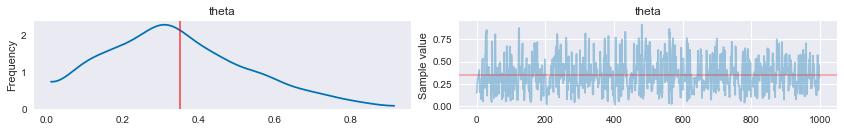

In [10]:
pm.traceplot(trace, lines={'theta':theta_real}); 

Otra función muy útil incluida en PyMC3 es `df_summary` que provee de una serie de medidas estadísticas que resumen el _a posteriori_.

In [11]:
pm.df_summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
theta,0.34835,0.182878,0.007274,0.043717,0.705102


Las dos primeras columnas contienen la media y la desviación estandar para cada parámetro según el _a posteriori_.

La tercer columna es el _MC Error_, esta es una estimación del error introducido en el muestreo (y que tiene en cuenta que las muestras no son realmente independientes). Para calcularlo se divide a cadena en $n$ bloques y se calcula la media con los valores de cada bloque, a los valores así obtenidos ($X$) se les calcula el _error estándar de la media_.

$$MC_{error} = \frac{s(X)}{\sqrt{n}} $$

Este error deberá estar por debajo de la precisión que deseamos para nuestras estimaciones.


Las dos últimas columnas contienen los límites del HPD. Por defecto `df_summary` usa el HPD 95%, `alpha=0.05` 

¿Qué es un HPD? antes de explicarlo veamoslo de forma gráfica. Usando otra función incluida en PyMC3:

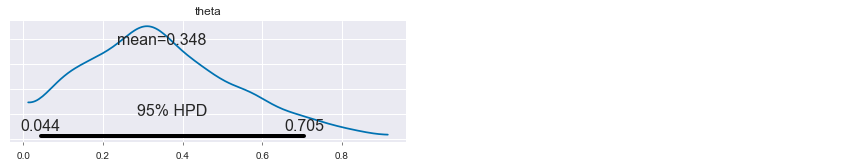

In [12]:
pm.plot_posterior(trace, kde_plot=True);

A la hora de comunicar los resultados de un análisis Bayesiano, lo más informativo es reportar la distribución completa, aunque esto no siempre es posible o deseable, por ejemplo el _a posteriori_ de una distribución multidimensional es imposible de dibujar! 

En general, se suele recurrir a distintas medidas que resumen el _a priori_, por ejemplo reportando la media (o mediana o la moda) de la distribución _a posteriori_. Algo un poco más informativo es reportar además un intervalo de credibilidad. Un intervalo de credibilidad es el análogo Bayesiano de un intervalo de confianza frecuentista. Una diferenca importan es quecomo el intervalo de crdibilidad es computado a partir del _a posteriori_ este sisi puede serinterprtado como el intervalo que contiene el valor del parámetro "correcto" con un X% de probabilidad. 

Existen varios criterios para definir intervalos de credibilidad uno muy usado en la literatura es lo que se conoce como intervalo de más alta densidad y nos refereriremos a el por su sigla en ingles, HPD (_Highest Posterior Density interval_). Un HPD es el intervalo, más corto, que contiene una porción fija de la densidad de probabilidad, generalmente el 95% (aunque otros valores como 90% o 50% son comunes). Cualquier punto dentro de este intervalo tiene mayor densidad que cualquier punto fuera del intervalo. Para una distribución unimodal, el HPD 95 es simplemente el intervalo entre los percentiles 2,5 y 97,5. 

En la figura superior hemos  usado 95%, pero podríamos haber usado 90%, 50%, 86.2%, 66.6% etc. El valor que elijamoses totalmente arbitrario y podemos  elegir cualquier que creamos conveniente para resumir nuestros resultados.

### Diagnóstico del muestreo

Al usar métodos numéricos para obtener el _a posteriori_ estamos introduciendo una fuente nueva de incertidumbre y de posibles errores. El problema anterior es muy simple y es facil para practicamente cualquier método de muestreo dar con la solución correcta. Pero en problemas más complejos esto no siempre es cierto. Por eso es necesario prestar atención y tratar de detectar errores de muestreo. Algunas técnicas para hacer esto son las siguientes:

#### Visualmente mirando el _trace_ para una simulación. 

Un muy muestreo es ruidoso, se hace dificil encontrar un patrón, la curva _se mueva libremente_ subiendo y bajando por distintos valores sin quedarse estancada por mucho tiempo en un mismo valor o valores similares. Además, uno espera ver cierto grado de autosimilitud entre distintas porciones, es decir si la cadena realmente ha convergido, distintas porciones deberían lucir similares entre si. Si en cambio la primer parte es la que luce distinto al resto, tenemos indicios de la necesidad de _burnin_ (eliminar la primer parte del muestreo), pero si la falta de autosimilitud se observa en toda la cadena necesitamos más pasos o (si esto es muy costoso) necesitamos reparametrizar el modelo o cambiar el método de muestreo.

imagenes/trace_patológicos.png


#### Visualmente mirando el _trace_ para una simulación. 

Otra forma visual de diagnosticar el muestreo es observar las gráficas generadas por _traceplot_ pero para más de una simulación. PyMC permite correr varias simulaciones en simultaneo y analizarlas juntas en un mismo _traceplot_. Para ello la función _sample_ tiene el argumento _njobs_ el cual corresponde al número de simulaciones que queremos realizar. Si las curvas no se parecen entre si, puede ser que haga falta un mayor _burnin_ o un mayor número de muestras.

In [13]:
with nuestro_primer_modelo:
    multi_trace = pm.sample(1000, njobs=4)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 3.0094:   4%|▍         | 8824/200000 [00:01<00:26, 7154.92it/s]
Convergence archived at 9000
Interrupted at 9,000 [4%]: Average Loss = 3.0302
 99%|█████████▊| 987/1000 [00:04<00:00, 135.13it/s]/home/osvaldo/anaconda3/lib/python3.5/site-packages/pymc3/step_methods/hmc/nuts.py:237: UserWarning: Step size tuning was enabled throughout the whole trace. You might want to specify the number of tuning steps.
  warnings.warn('Step size tuning was enabled throughout the whole '
/home/osvaldo/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
100%|██████████| 1000/1000 [00:05<00:00, 198.13it/s]
/home/osvaldo/anaconda3/lib/python3.5/site-packages/pymc3/step_methods/hmc/nuts.py:237: UserWarning: Step size tuning was enabled throughout the whole trace. You might want to specify the number of tuning steps.
  warnings.warn('Step size tuning was ena

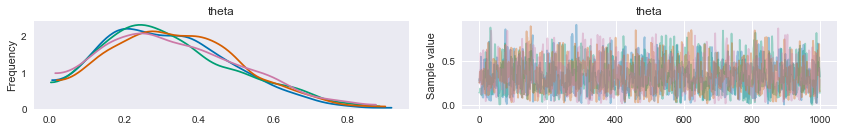

In [14]:
pm.traceplot(multi_trace);

### Prueba de Gelman-Rubin

Una forma cuantitativa de evaluar si hemos alcanzado la convergencia es mediante la prueba de Gelman-Rubin. Esta prueba se basa en comparar la varianza entre varias cadenas respecto de la varianza dentro de una misma cadena. Si se ha alcanzado la convergencia estas varianzas deberían ser iguales y deberíamos obtener un valor de $\hat R = 1$. Como regla empírica, se suele considerar que valores por encima de 1.1 podrían indicar la falta de convergencia.

In [15]:
pm.gelman_rubin(multi_trace)

{'theta': 1.0013639765710027, 'theta_logodds__': 1.0014671745292671}

Otra forma de visualizar $\hat R$ es usando la función _forestplot_, que además muestra la media y los intervalos de credibilidad 95% y 50% para todas las variables del _a posteriori_.

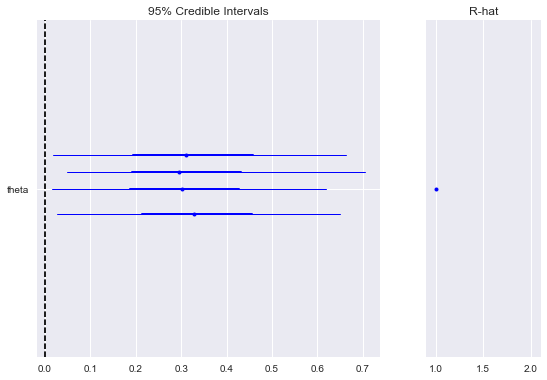

In [16]:
pm.forestplot(multi_trace);

#### Autocorrelación

Otra propiedad que es conveniente evaluar es la autocorrelación de la cadena, es decir la dependencia de un valor en la cadena respecto del anterior (o posterior). Las muestras generadas usando métodos MCMC, especialmente Metropolis-Hastings, pueden tener cierto grado de autocorrelación. Medir la autocorrelación suele ser util para dignosticar el correcto muestreo de nuestro modelo, por ello PyMC3 provee de la siguiente función.

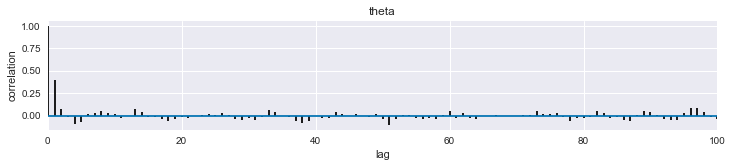

In [17]:
pm.autocorrplot(trace);

El gráfico muestra el grado de correlación observado para un punto en la cadena de Markov respecto de sucesivos puntos. Si, la autocorrelación es baja y solo se propaga para unos pocos puntos sucesivos (como en el anterior gráfico). Si en cambio la correlación es grande y se propaga varias decenas de iteraciones, nos estará indicando que el método de muestreo tiene serios problemas para muestrear adecuadamente. Una solución es probar con otro método de muestreo. Si el problema persiste es probable que debamos introducir modificaciones en nuestro modelo (como veremos más adelante).


¿Cuán eficiente es el thinning?

El _thinning_ consiste en tomar puntos de las cadena solo cada cierta cantidad de pasos. En Python diríamos tomar rebanadas (slices), por ejemplo podríamos hacer `trace[::5]`. La idea del _thinning_ es lograr aumentar la precisión de las estimaciones obtenidas con el MCMC, mediante la reducción de la autocorrelación. Sin embargo, varios autores([ref0](http://www.jstor.org/stable/2684714?seq=1#page_scan_tab_contents), [ref1](http://onlinelibrary.wiley.com/doi/10.1111/j.2041-210X.2011.00131.x/pdf)) han mostrado que realizar _thinning_, en general, no es más eficiente que simplemente aumentar la cantidad de pasos del MCMC. Intuitivamente la razón es la siguiente, al hacer _thinning_ logramos efectivamente eliminar la autocorrelación (lo que debería aumentar la precisión de la estimación) pero al mismo tiempo disminuimos la cantidad de puntos usados para aproximar la distribución lo que reduce la precisión! 

Otro uso común del _thinning_ se relaciona con disminuir el tamaño de la cadena a fin de facilitar su manipulación durante la fase de análisis del _a posteriori_.

#### Tamaño efectivo de la muestra

Dado que las muestras obtenidas por MCMC poseen cierto grado de autocorrelación, una cadena de MCMC de longitud $n$ contiene menos información que una cadena de igual longitud pero de muestras realmente independientes. ¿Cuál sería el tamaño de nuestra muestra si fuera realmente independiente? La respuesta (estimada) a esa pregunta la ofrece el _tamaño efectivo de la muestra_ que se calcula teniendo en cuenta la autocorrelación. En el caso ideal ambas cantidades deberían ser iguales, en la práctica basta con que sean similares, mientras menor sea el tamaño efectivo respecto de las cantidad de muestras más ineficiente es nuestro muestreo (lo cual no necesariamente es un problema, si podemos afrontar el costo computacional).

Además, el tamaño efectivo de la muestra puede servirnos de guía para estimar cuan largas deben ser nuestras simulaciones según nuestro problema. Si nuestro interés esta centrado en calcular valores medios, entonces basta con un tamaño efectivo de aproximadamente 100, en cambio si nuestro interés está en estimar con precisión valores que dependen de la cola de las distribuciones como los límites de los intervalos de credibilidad entonces deberemos tener tamaños efectivos de al menos 10000.

In [18]:
pm.effective_n(multi_trace)['theta'], len(multi_trace) * multi_trace.nchains

(1909.0, 4000)

Como puede verse todos las pruebas diagnósticas tienen una componente empírica y están relacionadas con aspectos computacionales y no directamente con la teoría Bayesiana/Probabilística.  En general ninguna de estas pruebas debe ser tomada como definitiva, si no como elementos de juicio que nos ayuden a tomar decisiones. Se recomienda el uso de una combinación de estas pruebas con un poco de juicio critico y escepticismo.